# Unit 5 - Financial Planning


In [62]:
# Initial imports
import os
import requests
import pandas as pd
#!pip install alpaca_trade_api
#from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json 

%matplotlib inline


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [64]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [65]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [66]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_data = requests.get(eth_url).json()

# Compute current value of my crpto
eth_price= eth_data['data']['1027']['quotes']['USD']['price']
btc_price= btc_data['data']['1']['quotes']['USD']['price']
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
totalcrypto_value = my_btc_value + my_eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $69894.00
The current value of your 5.3 ETH is $9550.07


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [67]:
# Current amount of shares
my_agg = 200
my_spy = 50



In [68]:
# Set Alpaca API key and secret
ALPACA_API_KEY = 'xxxxxxxxxxxxxxx'
ALPACA_SECRET_KEY = 'xxxxxxxxxxxxxxxxxxxxxxxxxxx'
# Create the Alpaca API object
alpaca = tradeapi.REST(
    ALPACA_API_KEY,
    ALPACA_SECRET_KEY,
    api_version="v2")


In [69]:
# Format current date as ISO format


today = pd.Timestamp("2020-03-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today   
).df
# Preview DataFrame
df_portfolio

AGG                  ...     SPY                   
                             open    high     low  ...     low   close     volume
time                                               ...                           
2020-03-19 00:00:00-04:00  106.47  109.22  105.56  ...  232.22  241.16  261233795

[1 rows x 10 columns]

In [70]:
# Pick AGG and SPY close prices
AGG_price = float(df_portfolio["AGG"]["close"])
SPY_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_price}")
print(f"Current SPY closing price: ${SPY_price}")

Current AGG closing price: $108.97
Current SPY closing price: $241.16


In [71]:
# Compute the current value of shares
AGG_value = AGG_price * my_agg
SPY_value = SPY_price * my_spy
totalshares_value = AGG_value + SPY_value
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${SPY_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${AGG_value:0.2f}")

The current value of your 50 SPY shares is $12058.00
The current value of your 200 AGG shares is $21794.00


### Savings Health Analysis

In [72]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
# Set the data for the shares value DataFrame
value_data = {
    "Amount": [totalcrypto_value, totalshares_value],
}

# Create a DataFrame with the current value of shares
df_savings = pd.DataFrame(value_data, index= ['Crypto', 'Shares'])

# Display savings DataFrame
display(df_savings.round(2))


,Amount
Crypto,79444.07
Shares,33852.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


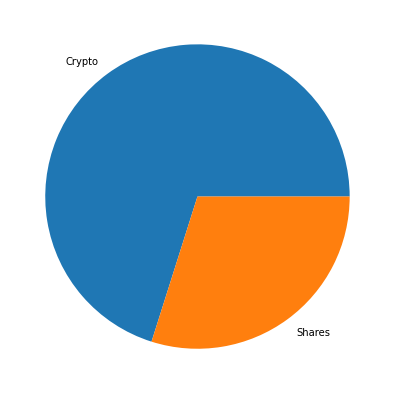

In [73]:
# Plot savings pie chart
from matplotlib import pyplot as plt 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(df_savings, labels= {'Shares', 'Crypto'}) 
  
# show plot 
plt.show() 


In [74]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = totalcrypto_value + totalshares_value

# Validate saving health
if total_savings > emergency_fund:
  print(f"Based on our analysis you have enough savings, {total_savings}!  Congratulations!")
elif total_savings == emergency_fund:
  print(f"Congratulations on reaching your savings goal.")
elif total_savings < emergency_fund:
  print(f" Based on our analysis you need ${emergency_fund - total_savings} to reach your savings goal.")



Based on our analysis you have enough savings, 113296.07!  Congratulations!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [75]:
# Set start and end dates of five years back from today. **** NOTE - Alpaca does not seem to be returning more than 1000 records
# Sample results may vary from the solution based on the time frame chosen
NY = 'America/New_York'
start_date=pd.Timestamp('2016-03-19', tz=NY).isoformat()
end_date=pd.Timestamp('2021-03-19', tz=NY).isoformat()


In [77]:

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
tickers1 = ["AGG", "SPY"]
# Get current closing prices for SPY and AGG
df_my_portfolio = alpaca.get_barset(
    tickers1,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000   
).df
# Preview DataFrame
df_my_portfolio

AGG                     ...      SPY                  
                             open      high      low  ...      low   close    volume
time                                                  ...                           
2017-03-30 00:00:00-04:00  108.52  108.5800  108.380  ...  235.270  236.27  40604487
2017-03-31 00:00:00-04:00  108.44  108.5300  108.420  ...  235.680  235.71  47583793
2017-04-03 00:00:00-04:00  108.31  108.6800  108.300  ...  233.910  235.37  58627715
2017-04-04 00:00:00-04:00  108.61  108.6500  108.520  ...  234.555  235.51  43130784
2017-04-05 00:00:00-04:00  108.48  108.7400  108.453  ...  234.540  234.77  84819899
...                           ...       ...      ...  ...      ...     ...       ...
2021-03-15 00:00:00-04:00  113.60  114.0100  113.600  ...  392.030  396.47  64471980
2021-03-16 00:00:00-04:00  113.97  114.0320  113.780  ...  395.080  395.94  65719794
2021-03-17 00:00:00-04:00  113.55  113.9778  113.480  ...  393.300  397.22  61876016
2021-03-18 00:00:00-04:00  113.32  113.8600  113.200  ...  390.750  391.41  98794050
2021-03-19 00:00:00-04:00  113.40  113.5400  113.330  ...  387.150  389.50  93819590

[1000 rows x 10 columns]

In [78]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Port = MCSimulation(
    portfolio_data = df_my_portfolio,
    num_simulation = 500,
    num_trading_days = 252*30
)

In [31]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns, 7560 trading days
MC_Port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991369,0.989304,1.005634,0.996253,0.997363,0.997909,0.994701,1.005657,1.002426,0.991899,1.012130,0.985448,0.999835,1.006863,1.005373,0.999770,1.014449,0.988851,0.994998,1.002755,1.001559,0.996443,1.006415,0.999160,0.986934,1.004938,1.010258,1.007452,1.008199,1.006608,1.006318,0.995198,0.993163,1.006354,0.996962,1.005625,1.002168,1.003099,0.997202,0.997876,...,0.994098,1.002114,0.993643,1.008018,0.992574,1.001554,1.005826,1.003451,0.997196,0.991493,1.009617,1.009591,1.007291,1.008341,1.000444,0.995901,1.003583,1.004276,1.008888,1.006148,0.992990,0.993248,1.002058,0.997238,1.007375,1.002549,0.993938,0.999413,0.987933,0.991101,1.007325,0.998523,0.986682,1.006026,1.002593,1.008742,0.990803,1.007356,0.998642,1.010503
2,0.994035,0.995849,0.999486,1.003427,0.991130,1.002944,0.994916,1.008650,0.980324,1.009587,1.012132,1.002824,0.989642,1.004512,1.005677,1.000980,1.002340,0.991428,1.003806,1.004704,0.999596,0.985435,1.003440,1.017047,1.005253,1.012998,1.005379,1.006047,1.002892,1.009043,0.999035,0.986579,0.989984,1.010999,0.995319,1.003589,0.991955,1.006097,0.994553,0.994883,...,0.995624,0.998234,0.992718,1.006501,0.998709,1.001573,1.005453,0.999361,0.986585,0.988394,1.017801,1.016253,0.999991,1.010366,0.991158,0.989203,1.009247,1.001079,1.021641,1.015986,0.991018,0.982077,1.003475,0.999921,1.001544,1.012259,0.990405,1.000713,0.982636,0.999226,1.008610,0.993908,0.986876,1.010448,1.006194,1.001501,0.989484,0.996297,0.992049,1.008216
3,0.987932,0.992932,0.998715,1.018369,0.999751,1.004692,0.997976,1.010490,0.986375,1.015611,1.017263,1.000258,0.980486,1.014633,1.008346,0.996477,0.999467,0.999139,1.004652,1.009325,1.008609,0.998089,1.003630,1.021435,1.001198,1.018386,1.007710,1.011257,0.994930,0.994594,0.996176,0.982275,0.986451,1.006672,0.991298,1.006940,0.990016,1.015315,0.997417,0.995457,...,0.995401,0.992209,0.991696,1.013077,0.994588,0.996962,1.005835,1.004581,0.994035,0.978993,1.016001,1.013830,1.005486,1.014037,0.984374,0.989952,1.004283,0.996563,1.026113,1.015836,0.994689,0.985086,0.996416,0.998718,1.005346,1.014710,1.003243,0.996355,0.990274,0.985837,1.008683,0.992306,0.988948,1.016119,1.002426,1.000777,0.978685,0.997014,0.993268,1.011493
4,0.990819,0.997446,0.996635,1.009729,0.996964,1.015897,1.005466,1.017550,0.994457,1.013397,1.018680,1.014267,0.986517,1.013517,1.015936,1.000966,0.990705,0.997704,1.001860,1.008194,1.000604,0.997374,1.010014,1.025816,0.996637,1.014597,1.003357,1.020933,0.992225,0.990840,0.984309,0.976879,0.981599,1.017464,0.991478,1.012465,0.988195,1.010373,0.996185,0.994844,...,0.991148,0.980673,1.002900,1.011792,0.992014,1.002199,1.001866,0.999028,0.989855,0.975277,1.016539,1.016018,0.997393,1.014780,0.996529,0.984800,1.018431,0.993825,1.023917,1.014607,0.993642,0.985233,0.996836,1.010575,1.005331,1.029022,1.010819,0.987388,0.987178,0.980277,1.010974,0.993289,0.995808,1.030594,1.006321,0.994361,0.968393,1.000909,0.990209,1.004951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

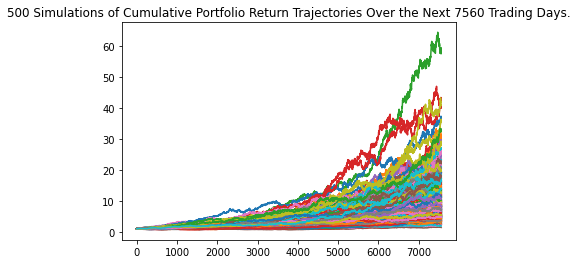

In [79]:
# Plot simulation outcomes
line_plot = MC_Port.plot_simulation()

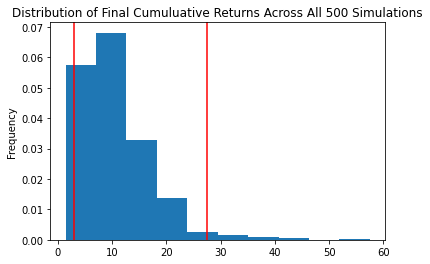

In [80]:
# Plot probability distribution and confidence intervals

dist_plot = MC_Port.plot_distribution()

### Retirement Analysis

In [81]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_Port.summarize_cumulative_return()


# Print summary statistics
print(summary)

count           500.000000
mean             10.676413
std               6.650259
min               1.414433
25%               5.935679
50%               9.019301
75%              13.691312
max              57.535477
95% CI Lower      3.051813
95% CI Upper     27.482924
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [82]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $61036.25 and $549658.48


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [83]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower2 = round(summary[8]*initial_investment2,2)
ci_upper2 = round(summary[9]*initial_investment2,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $91554.38 and $824487.72


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [84]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Port_5y = MCSimulation(
    portfolio_data = df_my_portfolio,
    num_simulation = 500,
    num_trading_days = 252*5
)

In [85]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Port_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012952,1.012212,0.997768,1.000507,1.006428,1.012319,0.997689,1.010820,0.983906,1.003261,0.990838,0.995046,0.993223,1.000684,1.000805,0.986160,1.004544,1.009266,1.010570,1.006288,0.997423,0.997577,1.005851,0.998156,1.004939,1.011988,0.988688,0.995485,0.994810,0.995612,1.001650,1.001780,1.005300,0.994830,1.006310,1.007401,1.003849,0.993077,0.999950,0.999485,...,0.993208,0.995620,1.000114,0.994354,0.985868,1.009164,0.996547,0.991016,0.995734,1.006446,1.008399,0.997944,1.010613,1.009009,0.999522,0.990777,1.003632,0.988618,0.991370,0.997783,0.997376,0.996113,0.997681,0.997485,1.004449,1.007355,0.997642,1.010818,1.010526,1.014146,0.998693,1.007379,1.001221,0.991634,1.015389,1.003400,1.012981,1.007413,0.998394,1.005827
2,1.017106,1.021733,0.988984,1.022850,1.008023,1.021611,0.989950,1.010202,0.969105,1.002201,0.994090,0.992894,1.000522,0.998196,1.007880,0.987419,1.001059,1.009635,0.998841,1.002200,0.988822,1.004663,1.001282,1.003769,1.012855,1.009427,0.980954,0.997481,0.985936,0.997892,1.003073,1.001704,1.001301,1.001261,0.999535,1.010466,1.007261,0.984077,0.999879,0.997468,...,1.006671,1.000780,0.998776,0.990400,0.984956,1.005941,0.992055,0.989754,1.000264,0.989144,1.004187,0.993738,1.013107,1.010096,0.996709,0.997539,0.998643,0.994543,0.991592,0.986709,0.989236,0.999558,0.999586,0.995700,0.995521,1.005984,0.998379,1.013576,1.002747,1.016724,0.993584,1.002867,0.993294,0.997177,1.019941,1.004467,1.010467,1.013921,1.004034,1.001793
3,1.008314,1.018200,0.997037,1.027119,1.002387,1.019304,0.981136,1.021434,0.968830,1.003674,1.001308,0.992697,1.005837,0.998544,1.003837,0.984933,0.996440,1.013574,0.996814,1.006544,0.994691,1.000087,1.009853,1.005257,1.003043,1.016048,0.991736,0.981850,0.981226,1.001781,1.017100,0.986491,0.994168,0.992659,1.000083,1.015458,1.006391,0.984218,0.991967,0.996422,...,1.010001,1.004478,0.998339,0.992689,0.978384,1.004034,0.982830,0.988445,1.008137,0.989339,1.020113,0.992093,1.018407,1.011186,1.000243,0.996946,1.010756,0.995844,0.992800,0.986289,0.976089,0.991985,0.995390,0.990823,1.007153,1.006851,0.997063,1.010152,1.006561,1.020781,0.989087,1.001802,0.988607,0.996193,1.029913,1.000557,1.015581,1.013121,1.002312,0.993931
4,1.010422,1.017995,0.996881,1.020888,0.991464,1.020384,0.977135,1.024478,0.973134,1.002914,1.003447,0.986150,0.997357,1.006073,1.006454,0.982089,0.989879,0.999285,0.998018,1.011764,1.003897,0.998556,1.016174,1.004776,0.999328,1.019273,1.001183,0.980121,0.985329,0.990321,1.030434,0.978088,1.008309,0.988594,0.989241,1.023972,1.013472,0.974792,0.997036,1.000826,...,1.017816,1.001588,1.003468,0.994842,0.977016,0.995487,0.984792,0.993269,1.002057,0.998969,1.017995,0.998065,1.023428,1.006673,1.013563,0.980885,1.008587,0.996323,0.987902,0.989653,0.974450,0.989872,1.003430,0.996121,1.014258,1.013840,0.984919,1.003359,1.005760,1.024636,0.977254,0.982293,1.002149,0.994272,1.021117,0.997570,1.011301,1.005117,1.004551,0.994269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

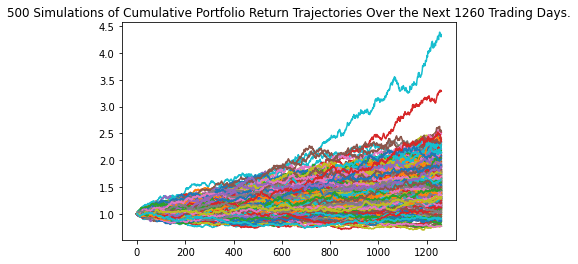

In [86]:
# Plot simulation outcomes
line_plot = MC_Port_5y.plot_simulation()

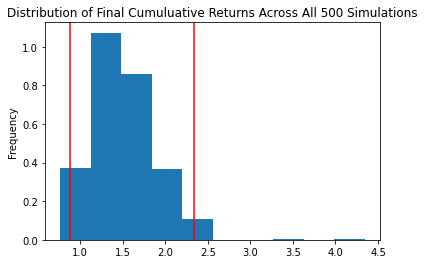

In [87]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Port_5y.plot_distribution()

In [88]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_5y = MC_Port_5y.summarize_cumulative_return()

# Print summary statistics
print(summary_5y)

count           500.000000
mean              1.512324
std               0.384746
min               0.766012
25%               1.250849
50%               1.470023
75%               1.743493
max               4.343450
95% CI Lower      0.881446
95% CI Upper      2.338929
Name: 1260, dtype: float64


In [89]:
# Set initial investment
initial_investment_5y = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5y = round(summary_5y[8]*initial_investment_5y,2)
ci_upper_5y = round(summary_5y[9]*initial_investment_5y,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5y} and ${ci_upper_5y}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $44072.3 and $116946.43


### Ten Years Retirement Option

In [90]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Port_10y = MCSimulation(
    portfolio_data = df_my_portfolio,
    num_simulation = 500,
    num_trading_days = 252*10
)

In [91]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Port_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990557,0.996138,1.000944,1.005050,1.020431,1.003850,0.988626,1.007851,1.007982,0.996500,1.003946,1.004667,1.006183,1.013553,0.985929,0.993424,0.998941,1.001525,0.989449,0.987313,1.007405,0.990471,1.001998,0.996443,0.992756,1.006849,1.007423,1.001344,1.007432,0.984445,1.001127,1.000591,1.007259,0.998231,0.996969,0.998023,1.006336,0.993820,1.002685,0.995431,...,1.005782,0.993736,0.999417,1.007846,1.011504,1.002947,0.993429,1.002387,1.010505,0.996083,0.997571,0.997904,1.004762,0.989172,1.014751,0.995449,0.996416,0.992776,0.997227,1.003741,0.998337,1.004050,0.996308,0.993013,0.999623,0.995117,1.001325,0.999970,0.993213,1.004959,1.007612,1.003975,0.992966,0.998727,1.005803,1.014891,1.005631,0.999450,0.993886,0.997412
2,0.988472,0.988016,0.994282,1.012890,1.019518,1.014946,0.993839,1.015557,1.013708,0.987038,0.994037,0.999559,1.009563,1.010457,0.977291,0.990274,0.988796,0.999198,0.995101,1.005363,1.000775,0.986541,0.997683,0.981551,0.981946,1.003019,1.018375,1.004340,0.999400,0.974955,1.004065,0.989304,0.994145,1.003754,1.000619,0.998669,0.999560,1.003808,1.000090,1.001256,...,1.004297,0.987415,0.996924,1.000670,1.020405,0.997141,0.999191,1.003680,1.013607,0.992806,1.004592,1.003828,0.996534,0.980610,1.027895,0.990476,0.988769,0.979179,1.004968,1.000918,0.994810,1.012642,0.995673,0.990483,1.007157,0.997686,1.004856,1.007832,0.994154,1.008959,1.009609,1.010748,1.006264,1.004228,1.026387,1.023393,1.002484,0.988758,0.996054,0.993621
3,0.989160,0.991071,0.993409,1.002403,1.014058,1.018639,0.989299,1.021672,1.003006,0.984718,0.993425,0.986798,1.016694,1.021139,0.980261,0.987117,0.995631,0.996426,0.992880,1.007746,0.998418,0.990488,0.990632,0.985539,0.983036,1.001554,1.019234,0.990128,0.996177,0.973064,1.010514,0.998820,0.997550,1.009234,1.001954,0.996083,0.995322,1.004377,0.994630,1.003745,...,1.005009,0.994103,0.990838,0.996068,1.011024,1.004100,0.996337,1.015422,1.009520,0.982963,1.006163,1.003132,0.986891,0.981130,1.029038,0.985087,0.984068,0.987190,1.003869,0.999050,0.991826,1.012019,0.998521,1.010002,1.000622,0.992474,1.003280,1.006804,1.005227,0.999995,1.003294,1.017805,1.014691,1.007261,1.023532,1.016919,1.010146,0.984208,1.000771,0.994860
4,0.993270,0.983523,0.991248,1.005627,1.005052,1.017357,0.990669,1.025018,1.007363,0.988830,1.003679,0.984650,1.023239,1.020581,0.981773,0.977882,0.995914,0.997877,0.991088,1.017105,1.001648,0.991032,0.991860,0.989444,0.979292,0.999751,1.019952,0.986217,0.996965,0.978022,1.011141,0.997111,1.000266,1.002782,1.000589,1.000362,0.991006,1.008252,0.994851,1.004517,...,0.998197,0.997246,0.999337,1.013322,1.012800,1.016696,1.001603,1.007484,1.007020,0.985417,1.000944,0.997392,0.982589,0.971283,1.019703,0.981553,0.999113,0.986267,1.017718,0.995355,0.987958,1.002709,1.006300,1.014491,0.997147,1.004201,1.020671,1.000484,1.006463,0.993105,0.995477,1.013154,1.014449,1.007037,1.013911,1.024448,1.006056,0.986712,1.007765,0.988937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

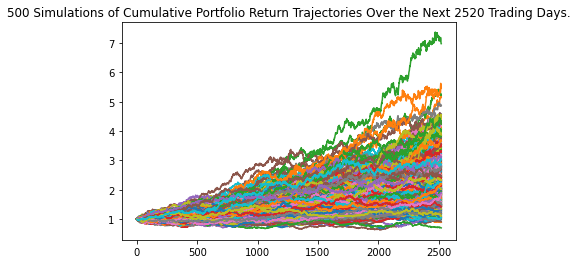

In [92]:
# Plot simulation outcomes
line_plot = MC_Port_10y.plot_simulation()

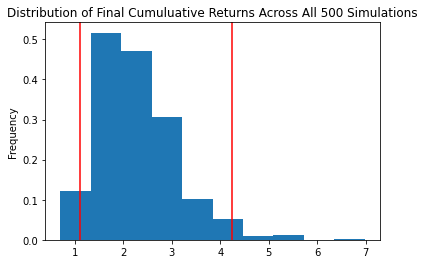

In [93]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Port_10y.plot_distribution()

In [94]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_10y = MC_Port_10y.summarize_cumulative_return()

# Print summary statistics
print(summary_10y)

count           500.000000
mean              2.277652
std               0.809455
min               0.705669
25%               1.708532
50%               2.133145
75%               2.715422
max               6.977276
95% CI Lower      1.103527
95% CI Upper      4.247210
Name: 2520, dtype: float64


In [95]:
# Set initial investment
initial_investment_10y = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10y = round(summary_10y[8]*initial_investment_10y,2)
ci_upper_10y = round(summary_10y[9]*initial_investment_10y,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10y} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10y} and ${ci_upper_10y}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $44141.07 and $169888.39
